### Import modules

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

## Function block

In [2]:
'''Function to calculate IQR and 25, 75 quantile'''
def perc_iqr(col):
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    iqr = perc75 - perc25
    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(iqr),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*iqr, l=perc75 + 1.5*iqr))
    return (perc25 - 1.5*iqr, perc75 + 1.5*iqr, perc25, perc75)

In [32]:
def get_boxplot(col, df_1, df_2):
    fig, ax = plt.subplots(1, 2, figsize = (8, 2))
    sns.boxplot(x=col, y='score', data=df_1, ax=ax[0])
    ax[0].set_title('Boxplot for ' + col)
    sns.boxplot(x=col, y='score', data=df_2, ax=ax[1])
    ax[1].set_title('Boxplot for ' + col)
    plt.xticks(rotation=45)
    plt.show()

In [100]:
def get_stat_dif(col, df):
    cols = df.dropna()[col].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df[df[col] == comb[0]] ['score'], df[df[col] == comb[1]]['score']).pvalue <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', col)
            break

In [102]:
def get_stat(col, df):
    cols = df.dropna()[col].unique()
#    print(cols)
    combinations_all = list(combinations(cols, 2))
#    print(combinations_all)
    for comb in combinations_all:
#        print(df[df[col] == comb[0]] ['score'])
#        print(df[df[col] == comb[1]] ['score'])
        print(ttest_ind(df[df[col] == comb[0]] ['score'], df[df[col] == comb[1]]['score']).pvalue)

### Basic Setup (reading csv, setup)

In [3]:
data = pd.read_csv('stud_math.csv')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
sns.set()
display(data.head(10))
display(pd.DataFrame(data['score']).info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

### Basic treatment

In [4]:
# Deleting non-described column
data.drop(['studytime, granular'], inplace=True, axis=1)

# Lower columns names
data.columns = data.columns.str.lower()

#Clearing Score column
data.dropna(subset = ['score'], inplace=True)
data = data[data['score'].between(0, 100, inclusive='right')].reset_index(drop=True)

### age column

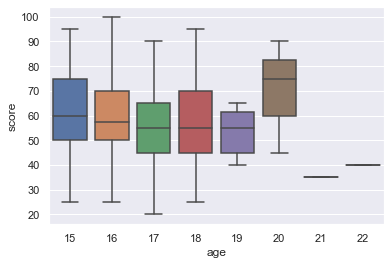

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


16    96
17    90
15    76
18    69
19    16
20     3
Name: age, dtype: int64

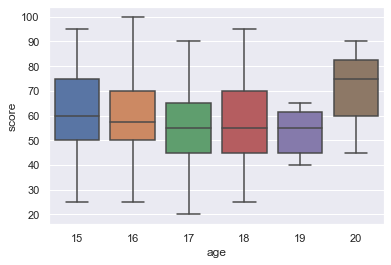

In [5]:
sns.boxplot(x='age', y='score', data=data)
plt.show()

display(data['age'].describe())
age_iqr = perc_iqr(data['age'])

# According to boxplot and IQR delete outliers
data = data[data['age'].between(age_iqr[0], age_iqr[1], inclusive='neither')]

display(data['age'].value_counts())

sns.boxplot(x='age', y='score', data=data)
plt.show()

### absences column treatment

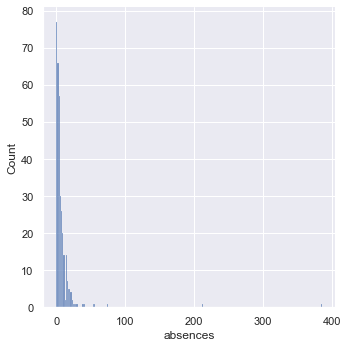

count    340.000000
mean       8.082353
std       24.772100
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  340 non-null    float64
dtypes: float64(1)
memory usage: 13.6 KB


None

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


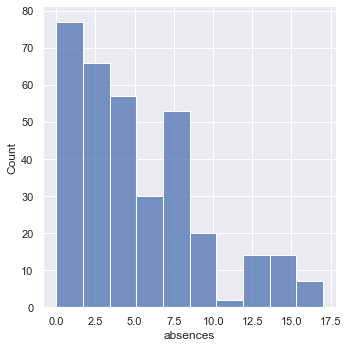

<function matplotlib.pyplot.show(close=None, block=None)>

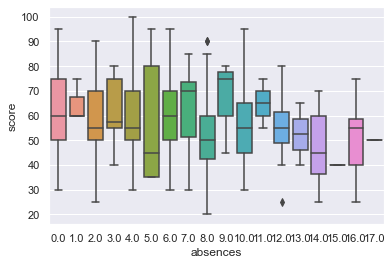

In [6]:
# Before
sns.displot(data['absences'])
plt.show()

display(data['absences'].describe())
display(pd.DataFrame(data['absences']).info())
absences_iqr = perc_iqr(data['absences'])

# According to displot and IQR I desided to reduce high outliers to perc75
data['absences'] = data['absences'].apply(lambda x: absences_iqr[3] if x > absences_iqr[1] else x)

# After
sns.displot(data['absences'])
plt.show()

sns.boxplot(x='absences', y='score', data=data)
plt.show

### Checking column data for range

In [7]:
right_list = ['GP', 'MS', 'F', 'M', 'U', 'R', 'LE3', 'GT3', 'T', 'A', 'yes', 'no', 'teacher', 'health', 'services', 'at_home'
             ,'other', 'home', 'reputation', 'course', 'mother', 'father']
for col in data.drop(['absences', 'score'], axis=1):
    if data[col].dtype != 'object':
        data[col] = data[col].apply(lambda x: abs(x) if x < 0 else float(str(x)[0]) if x > 9 else None if pd.isnull(x) else x)
    else:
        data[col] = data[col].astype(str).apply(lambda x: None if x.strip() == '' else None if x not in right_list else x)

# Plan
## Making 3 different DafaFrames:
### 1. Delete all rows with empty cells
### 2. Delete only rows with empty cells in 'score' columns (NaN and 0)
### 3. Filling NAN cells with mode or some another data
## Work with every DF
## Select the best


In [25]:
df1 = data.dropna()
df1 = df1[df1['score'].between(0, 100, inclusive='right')].reset_index(drop=True)

In [9]:
df2 = data.copy()

In [10]:
df3 = data.copy()

## DataFrame 1 (without empty cells - deleting all raws)

## DataFrame 2 (With empty cell but Score columns)

In [11]:
df2.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,0.015757,-0.049849,-0.013625,-0.005880,0.162996,0.114228,0.135290,0.021706,0.031959,-0.020127,0.069828
medu,0.015757,1.000000,0.606258,-0.169193,0.065638,-0.198983,-0.000707,0.029403,0.079968,-0.039489,0.083138,0.181841
fedu,-0.049849,0.606258,1.000000,-0.152593,-0.022033,-0.246591,-0.005901,-0.019327,0.052317,0.008996,-0.000828,0.125689
traveltime,-0.013625,-0.169193,-0.152593,1.000000,-0.106952,0.114852,-0.024536,-0.018266,0.032764,-0.004214,-0.049030,-0.080789
studytime,-0.005880,0.065638,-0.022033,-0.106952,1.000000,-0.132196,0.066943,-0.120445,-0.023710,-0.094422,-0.065366,0.134241
failures,0.162996,-0.198983,-0.246591,0.114852,-0.132196,1.000000,-0.026545,0.101504,0.112011,0.098182,0.173402,-0.274286
famrel,0.114228,-0.000707,-0.005901,-0.024536,0.066943,-0.026545,1.000000,0.150913,0.039547,0.116129,-0.122546,0.050119
freetime,0.135290,0.029403,-0.019327,-0.018266,-0.120445,0.101504,0.150913,1.000000,0.295895,0.079685,0.059507,-0.002888
goout,0.021706,0.079968,0.052317,0.032764,-0.023710,0.112011,0.039547,0.295895,1.000000,-0.000880,0.141277,-0.178604
health,0.031959,-0.039489,0.008996,-0.004214,-0.094422,0.098182,0.116129,0.079685,-0.000880,1.000000,-0.022409,-0.083532


In [12]:
df2

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,1.0,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,1.0,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,1.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,1.0,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,1.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,MS,F,1.0,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
347,MS,M,2.0,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,8.0,45.0
348,MS,M,1.0,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
350,MS,M,1.0,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


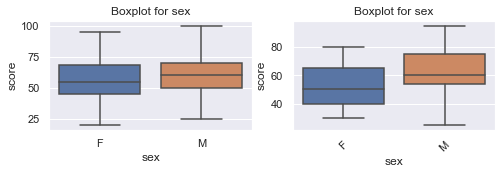

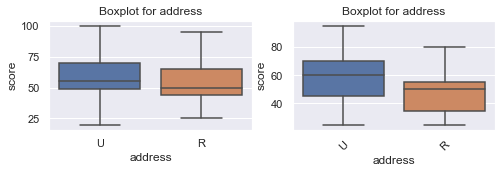

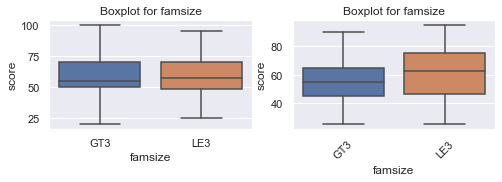

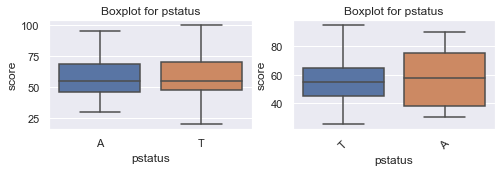

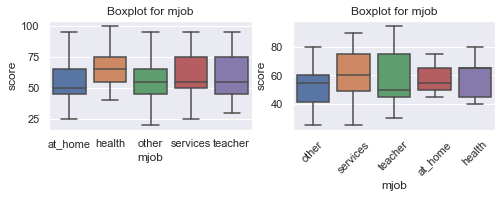

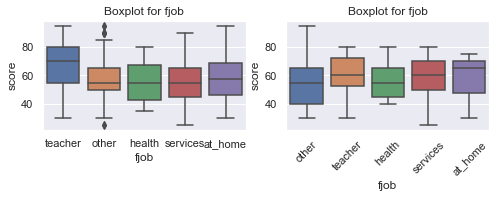

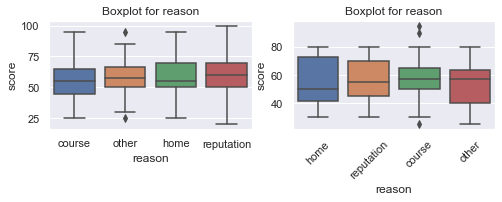

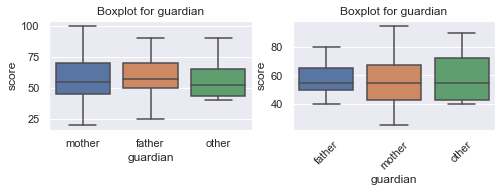

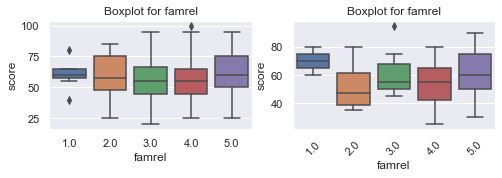

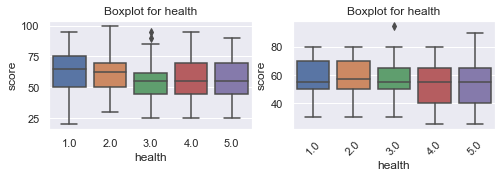

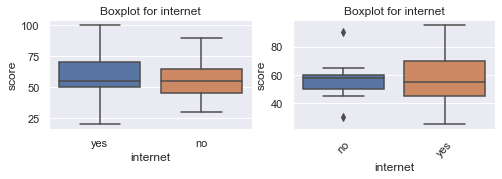

In [45]:
for item in ['sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 
             'reason', 'guardian', 'famrel', 'health', 'internet']:
    get_boxplot(item, df2, df1)

In [103]:
for item in ['sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 
             'famrel', 'health', 'internet']:
    get_stat_dif(item, df2)
get_stat('reason', df2)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob
0.669413149234061
0.533158127526858
0.9914738162182083
0.288016273434337
0.7749950743584614
0.6611496823853051
